<img src="logo.jpg" />

## [Pedram Jahangiry, Fall 2019](www.pedramjahangiry.com) 

# Support Vector Regression (SVR)

* SVM can be used for regression and classification. 
* SVM supports both linear and non linear models. 
* In SVM the goal is to make sure that the errors don't exceed a threshold.


## Regression:

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("wage.csv")

In [4]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,0.893048,0.309217,0.0,1.0,1.0,1.0,1.0
black,935.0,0.128342,0.334650,0.0,0.0,0.0,0.0,1.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


## Data preprocessing 

In [7]:
df.isna().sum()  

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [8]:
df.drop('feduc', axis=1, inplace=True)

In [9]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      935 non-null float64
dtypes: float64(2), int64(8)
memory usage: 73.1 KB


In [10]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

### Defining the variables and splitting the data

In [11]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [12]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


## Scaling the features: 


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

###  SVM Regression with Sklearn

In [14]:
from sklearn.svm import SVR

In [15]:
# Fitting SVM regression to the Training set
SVM_regression = SVR(C=1, kernel='linear')
SVM_regression.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# Predicting the Test set results
y_pred_test = SVM_regression.predict(X_test)

In [17]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test':y_pred_test, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test,resid
434,975000.0,904863.916760,70136.083240
238,1730000.0,905645.481308,824354.518692
531,675000.0,904285.751144,-229285.751144
157,1899000.0,905445.387311,993554.612689
601,1500000.0,905132.081542,594867.918458


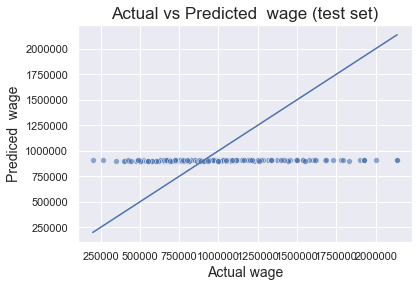

In [18]:
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

what is happening here? Note that C=1 by default and it allows for a wide margin. Our predections are getting closer and closer to the mean! 

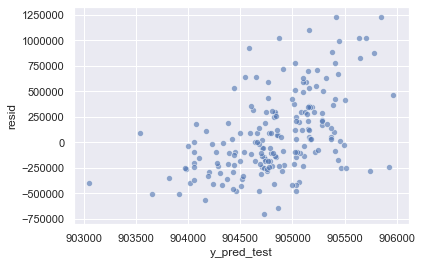

In [19]:
sns.scatterplot(x='y_pred_test', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the model on test dataset

In [20]:

MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

157731109889.15

In [21]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

397153.76

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [22]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear']} 

In [23]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [24]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=0, cv=5)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting. 

In [25]:
# May take awhile!
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [26]:
grid.best_params_

{'C': 10000, 'gamma': 1, 'kernel': 'linear'}

In [27]:
grid.best_estimator_

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [28]:
y_pred_test_optimized = grid.predict(X_test)

In [29]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test_optimized':y_pred_test_optimized, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test_optimized,resid
434,975000.0,9.211785e+05,70136.083240
238,1730000.0,1.266955e+06,824354.518692
531,675000.0,7.982157e+05,-229285.751144
157,1899000.0,1.204158e+06,993554.612689
601,1500000.0,9.855820e+05,594867.918458


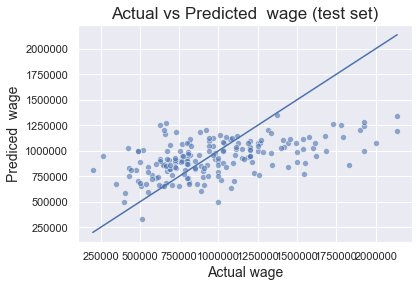

In [30]:
sns.scatterplot(x=y_test, y=y_pred_test_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

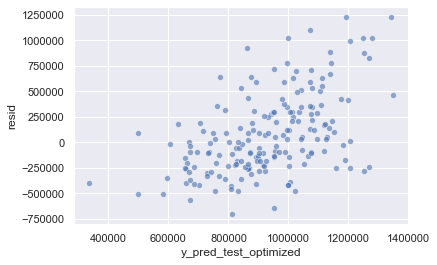

In [31]:
sns.scatterplot(x='y_pred_test_optimized', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the optimized model on test dataset

In [32]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test_optimized)),2)
MSE_test

114541845707.63

In [33]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

338440.31

---

Let's quickly compare this one with a **polynomial regression**

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [35]:
poly_features= PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)  
X_poly_test = poly_features.fit_transform(X_test)  

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_hat_poly = model.predict(X_poly_test)

In [39]:
MSE_test = round(np.mean(np.square(y_test - y_hat_poly)),2)
MSE_test

114712392162.91

In [40]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

338692.18

###  Additional links:
1. SKlearn documentation : https://scikit-learn.org/stable/modules/svm.html
2. SVR examples: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
3. SVR intuition: https://www.saedsayad.com/support_vector_machine_reg.htm